In [1]:
import numpy as np
from pulse_designer import *
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def waveform_plot_compare(pulse_1, pulse_2, sampl_rate_Hz=1e9, freq_res_Hz=1e6):
    # variables:
    #     pulse: the input pulse
    #     freq_res: the minimum frequency resolution for the 
    #               fast fourier transform

    # matplotlib.rcParams['font.family'] = 'Times New Roman'
    matplotlib.rcParams['font.family'] = 'DejaVu Serif'
    # matplotlib.rcParams['font.size'] = 20
    matplotlib.rcParams['font.size'] = 16
    
    fig = plt.figure(figsize=(12, 4.2))

    ax = plt.subplot(1, 2, 1)
    ax.plot(np.real(pulse_1), label=r'Re $u(n)$', color='r', marker='o', zorder=0.5)
    ax.plot(np.imag(pulse_2), label=r'Im $v(n)$', color='b', marker='s', zorder=0.4)
    
    ax.axhline(0, color='gray', linestyle='--', zorder=-np.inf)
    ax.axvline(0.5 * len(pulse_1) - 0.5, color='gray', linestyle='--', zorder=-np.inf)
    
    ax.set_xlim(0, len(pulse_1) - 1)

    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Amplitude (V)')
    ax.legend()

    ax = plt.subplot(1, 2, 2)
    freq, pulse_fft_pad = fft_tool(pulse_1, sampl_rate_Hz, freq_res_Hz)
    freq_MHz = 1e-6 * freq
    ax.axvline(0, color='gray', linestyle='--', zorder=-np.inf)
    ax.plot(freq_MHz, np.abs(np.real(pulse_fft_pad)), color='r', label=r'$|u(\omega)|$', zorder=0.5)
    # ax.plot(freq_MHz, np.imag(pulse_fft_pad), label='Q', zorder=0.4)

    freq, pulse_fft_pad = fft_tool(pulse_2, sampl_rate_Hz, freq_res_Hz)
    freq_MHz = 1e-6 * freq
    # ax.plot(freq_MHz, np.real(pulse_fft_pad), label='I', zorder=0.5)
    ax.plot(freq_MHz, np.abs(np.real(pulse_fft_pad)), color='b', label=r'$|v(\omega)|$', zorder=0.4)

    nyquist_freq_MHz = 0.5e-6 * sampl_rate_Hz
    ax.set_xlim(-nyquist_freq_MHz, nyquist_freq_MHz)
    
    max_pulse_fft_pad = np.max(np.abs(np.real(pulse_fft_pad)))
    ax.set_ylim(1e-6 * max_pulse_fft_pad, 10 * max_pulse_fft_pad)

    plt.xticks([-500, -250, 0, 250, 500], [r'-500', r'-250', r'0', r'250', r'500'])
    
    ax.set_xlabel('Frequency (MHz)')
    ax.set_ylabel(r'Amplitude spectrum (V$\cdot$ns)')
    ax.set_yscale('log')
    ax.legend()

    fig.tight_layout()
    plt.show()
    return fig

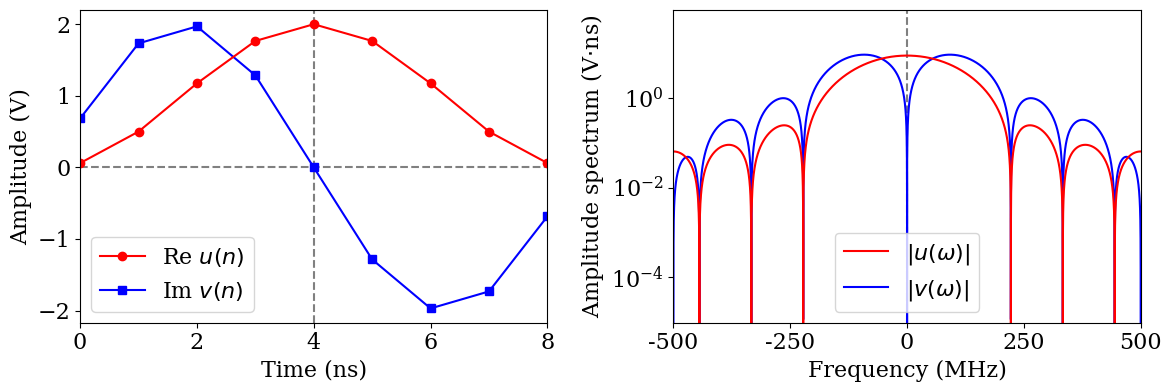

In [3]:
N = 9
u = u_pulse(N, 0)
v = v_pulse(N, 0)
fig = waveform_plot_compare(u, v, freq_res_Hz=1e3)

In [4]:
fig.savefig(fname='figures/pulse_u_v.pdf')